<a href="https://colab.research.google.com/github/mariajoseph83/DSA_python/blob/main/Geeksforgeeks/Trees/Boundary_traversal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<font face="monospace">

Boundary Traversal of binary tree [question](https://www.geeksforgeeks.org/problems/boundary-traversal-of-binary-tree/1?itm_source=geeksforgeeks&itm_medium=article&itm_campaign=bottom_sticky_on_article)

MediumAccuracy: 23.33% &nbsp;&nbsp;Submissions: 337K+ &nbsp;&nbsp;Points: 4

Given a Binary Tree, find its Boundary Traversal. The traversal should be in the following order:<br>


Left boundary nodes: defined as the path from the root to the left-most node ie- the leaf node you could reach when you always travel preferring the left subtree over the right subtree.

Leaf nodes: All the leaf nodes except for the ones that are part of left or right boundary.

Reverse right boundary nodes: defined as the path from the right-most node to the root. The right-most node is the leaf node you could reach when you always travel preferring the right subtree over the left subtree. Exclude the root from this as it was already included in the traversal of left boundary nodes.
Note: If the root doesn't have a left subtree or right subtree, then the root itself is the left or right boundary.

Example 1:

Input:
```
        1
      /   \
     2     3  
    / \   / \
   4   5 6   7
      / \
     8   9
```
   
Output: 1 2 4 8 9 6 7 3

Explanation:

![](https://media.geeksforgeeks.org/wp-content/uploads/20211103204119/graph4-300x300.png)

Example 2:

Input:
```
            1
           /
          2
        /  \
       4    9
     /  \    \
    6    5    3
             /  \
            7     8
```

Output: 1 2 4 6 5 7 8

Explanation:

![](https://media.geeksforgeeks.org/wp-content/uploads/20211103204646/graph1-300x300.png)


As you can see we have not taken the right subtree.

Your Task:
This is a function problem. You don't have to take input. Just complete the function boundary() that takes the root node as input and returns an array containing the boundary values in anti-clockwise.

Expected Time Complexity: O(N).

Expected Auxiliary Space: O(Height of the Tree).

Constraints:
1 ≤ Number of nodes ≤ 105

1 ≤ Data of a node ≤ 105
<font>

In [3]:
class TreeNode:
    def __init__(self, val):
        self.right = None
        self.data = val
        self.left = None

In [4]:
#User function Template for python3


class Solution:
    def printBoundaryView(self, root):
        stack=[root.data]
        def left(root):
            if not root:
                return
            while True:
                if root.left:
                    stack.append(root.data)
                    root=root.left
                elif root.right:
                    stack.append(root.data)
                    root=root.right
                else:
                    return
        def leaf(root):
            if root:
                leaf(root.left)
                if not root.left and not root.right:
                    stack.append(root.data)
                leaf(root.right)
        def right(root):
            if not root:
                return stack
            stack1=[]
            while True:
                if root.right:
                    stack1.append(root.data)
                    root=root.right
                elif root.left:
                    stack1.append(root.data)
                    root=root.left
                else:
                    stack1.reverse()
                    return stack + stack1
        left(root.left)
        leaf(root.left)
        leaf(root.right)
        return right(root.right)

In [5]:
root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(3)
root.left.left = TreeNode(4)
root.left.right = TreeNode(5)
root.right.left = TreeNode(6)
root.right.right = TreeNode(7)
root.left.right.left = TreeNode(8)
root.left.right.right = TreeNode(9)

In [9]:
import matplotlib.pyplot as plt
import networkx as nx

def add_edges(tree, parent_name, graph, pos=None, level=0, width=2.0, vert_gap=0.2, xcenter=0.5):
    if pos is None:
        pos = {parent_name: (xcenter, 1 - level * vert_gap)}
    else:
        pos[parent_name] = (xcenter, 1 - level * vert_gap)
    neighbors = [tree.left, tree.right]
    for i, node in enumerate(neighbors):
        if node is not None:
            name = str(node.data)
            graph.add_node(name)
            graph.add_edge(parent_name, name)
            pos = add_edges(node, name, graph, pos=pos, level=level+1, width=width/2, vert_gap=vert_gap, xcenter=xcenter - width/2 + i*width)
    return pos

def Tree(root):
    # Create graph representation of the binary tree
    tree_graph = nx.DiGraph()

    # Add edges to the graph
    pos = add_edges(root, str(root.data), tree_graph)

    # Draw the graph
    nx.draw(tree_graph, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=12, font_weight="bold", arrowsize=20)
    plt.title("Binary Tree")

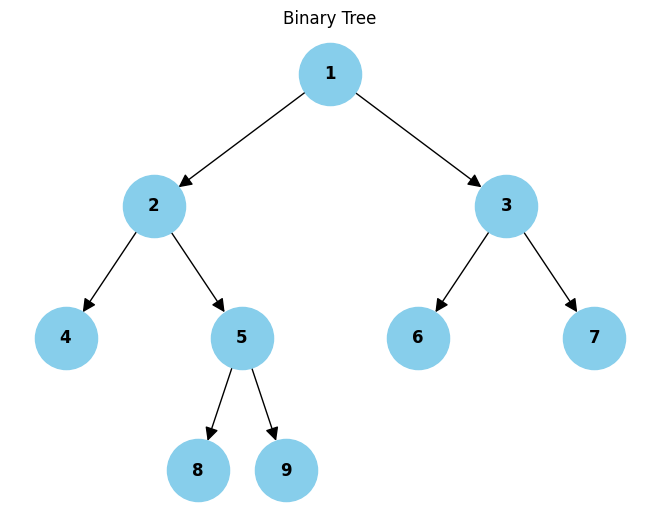

In [10]:
Tree(root)

In [6]:
s=Solution()
s.printBoundaryView(root)

[1, 2, 4, 8, 9, 6, 7, 3]